In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df = pd.read_csv("SDE1_hotmap.csv")
df.head()

,Ventilation mode,Ceiling fan,Temperature1,SPL,TS_id02,TS_id03,TS_id05,TS_id06,Temperature2,TS_id07,...,AA_id15,AA_id16,AA_id17,AA_id18,AA_id19,AA_id20,AA_id21,AA_id22,AA_id23,AA_id24
0,AC,0,27.4,40,Slightly Warm,Neutral,Warm,Neutral,26.9,Neutral,...,Not at all,Not at all,Slightly,NaN,Not at all,Not at all,Not at all,Slightly,Not at all,Not at all
1,AC,0,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,...,Not at all,Not at all,Slightly,Slightly,Not at all,Not at all,Slightly,Slightly,Not at all,Not at all
2,AC,1,27.5,40,Slightly Warm,Neutral,Slightly Warm,Neutral,26.8,Slightly Warm,...,Not at all,Not at all,Slightly,Slightly,Not at all,Not at all,Not at all,Slightly,Not at all,Not at all
3,AC,1,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,...,Not at all,Not at all,NaN,Moderately,Not at all,Not at all,Slightly,Slightly,NaN,Not at all
4,AC,2,27.4,40,Slightly Warm,Slightly Cool,Neutral,Neutral,26.8,Slightly Warm,...,Not at all,Not at all,Slightly,Slightly,Not at all,Not at all,Not at all,Slightly,Slightly,Not at all


In [5]:
obj_df = df.select_dtypes(include=['object']).copy()

In [6]:
category = {"TS_id02":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id03":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id05":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id06":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id07":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id09":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id10":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id11":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id12":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id13":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id14":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id15":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id16":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id17":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id18":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id19":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id20":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id21":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id22":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id23":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TS_id24":    {"Cold": 1, "Cool": 2, "Slightly Cool": 3, "Neutral": 4, "Slightly Warm": 5, "Warm": 6, "Hot": 7},
           "TA_id02":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id03":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id05":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id06":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id07":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id09":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id10":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id11":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id12":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id13":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id14":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id15":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id16":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id17":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id18":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id19":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id20":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id21":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id22":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id23":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "TA_id24":    {"Clearly unacceptable": 1, "Just unacceptable": 2, "Just acceptable": 3, "Clearly acceptable": 4},
            "AA_id02": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id03": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id05": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_d06": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id07": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id09": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id10": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id11": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id12": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id13": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id14": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id15": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id16": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id17": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id18": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id19": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id20": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id21": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id22": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id23": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5},
            "AA_id24": {"Not at all": 1, "Slightly": 2, "Moderately": 3, "Very": 4, "Extremely": 5}    }

In [7]:
obj_df = obj_df.replace(category)
obj_df = obj_df.replace({"0":"NaN"})
obj_df_noNA = obj_df.fillna(0)
#obj_df_noNA.head()

In [10]:
obj_df_noVM = obj_df.drop('Ventilation mode', axis=1)
obj_df_noNA_noVM = obj_df_noNA.drop('Ventilation mode', axis=1)

In [12]:
obj_df_noVM = obj_df_noVM.astype(float)
Thermal_acceptance = obj_df_noVM.iloc[:, 21:42]
Thermal_acceptance = Thermal_acceptance.rename({"TA_id02": "1","TA_id03": "2", "TA_id05": "3", "TA_id06": "4", "TA_id07": "5", "TA_id09": "6", "TA_id10": "7", "TA_id11": "8", "TA_id12": "9", "TA_id13": "10", "TA_id14": "11", "TA_id15": "12", "TA_id16": "13", "TA_id17": "14", "TA_id18": "15", "TA_id19": "16", "TA_id20": "17", "TA_id21": "18", "TA_id22": "19", "TA_id23": "20", "TA_id24": "21"}, axis=1)

TypeError: You have to supply one of 'by' and 'level'

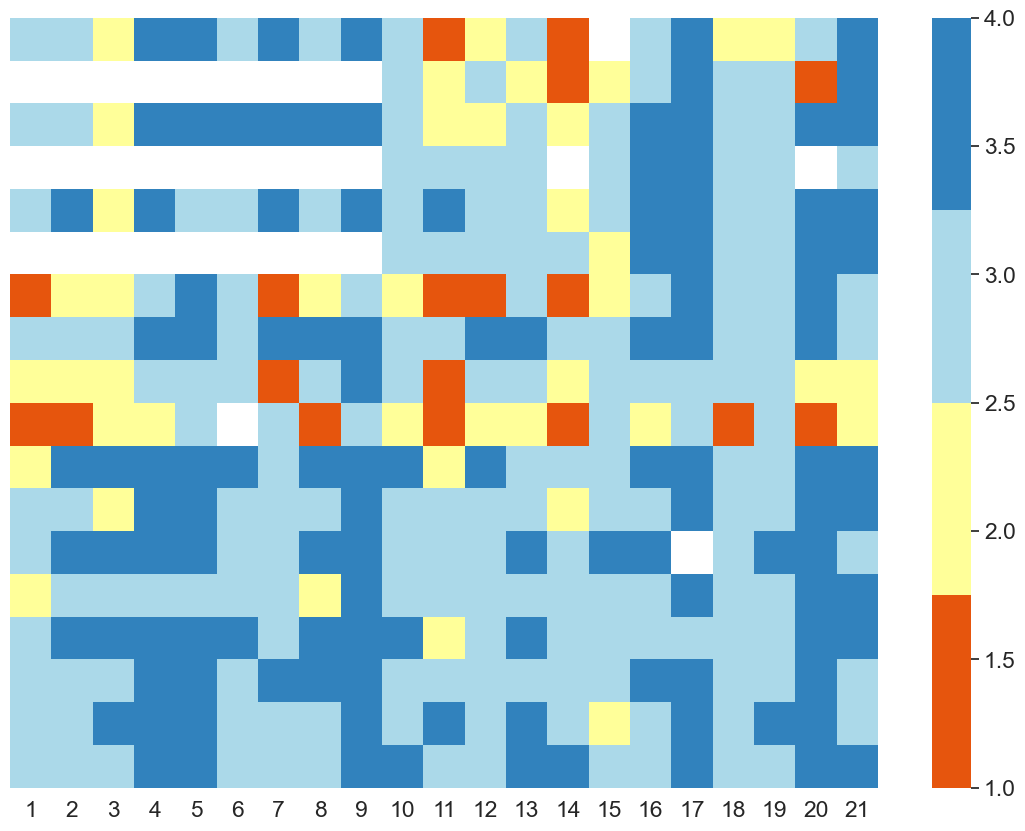

In [64]:
HVAC = ['AC (26°C)','AC (26°C)','AC (26°C)','AC (26°C)','AC (26°C)','AC (26°C)', 
       'NV','NV','NV','NV','NV','NV','NV','NV','NV','NV','NV','NV']
rav = ['0.1 m/s','0.1 m/s','0.2 m/s','0.2 m/s','0.3 ± 0.1 m/s','0.3 ± 0.1 m/s',
       '0.1 ± 0.1 m/s','0.1 ± 0.1 m/s','0.1 ± 0.1 m/s','0.1 ± 0.1 m/s',
       '0.6 ± 0.1 m/s','0.6 ± 0.1 m/s','0.6 ± 0.1 m/s','0.6 ± 0.1 m/s',
       '0.9 ± 0.2 m/s','0.9 ± 0.2 m/s','0.9 ± 0.2 m/s','0.9 ± 0.2 m/s']
tnl = [
    '40 dBA','45 dBA','40 dBA','45 dBA','40 dBA','45 dBA','45 dBA','50 dBA',
    '55 dBA','60 dBA','45 dBA','50 dBA','55 dBA','60 dBA','45 dBA','50 dBA','55 dBA','60 dBA',
]

tuples = list(zip(HVAC, rav, tnl))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second', 'third'])

d = Thermal_acceptance.to_dict('list')
df = pd.DataFrame(d, index=index)

def add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .08], [xpos, xpos], color='black', transform=ax.transAxes, linewidth=0.5)
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    print(labels)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    xpos = -.08
    scale = 1./df.index.size
    for level in range(df.index.nlevels):
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            add_line(ax, pos*scale, xpos)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale - 0.008
            ax.text(xpos+.04, lypos, label, ha='center', transform=ax.transAxes) 
        add_line(ax, pos*scale , xpos)
        xpos -= .08

fig, ax = plt.subplots(figsize=(14,10))

#cmap = sns.color_palette("Spectral", 4) 
cmap = ["#e6550d", "#ffff99", "#abd9e9", "#3182bd" ]
sns.set(font_scale = 1.5, style="white")
Thermal_acceptance_htmp = sns.heatmap(Thermal_acceptance, center = 2.5, cmap = cmap)
plt.xlabel("Participant ID", size=20)

labels = ['' for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.set_ylabel('')
ax.set_xlabel('')

label_group_bar_table(ax, df)
fig.subplots_adjust(bottom=.1*df.index.nlevels)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks([1.4, 2.1, 2.9, 3.6])
colorbar.ax.set_yticklabels(colorbar.ax.get_yticklabels(), rotation=90, va='center', ) # rotate colar bar label
# colorbar.ax.tick_params(labelsize='large')

colorbar.set_ticklabels(['    Clearly\nunacceptable', '       Just\nunacceptable', '     Just\nacceptable', '    Clearly\nacceptable'])
plt.savefig("sns-heatmap.png")